In [25]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

#### Importing the dataset

In [26]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs/src/master/ Dataset_Traffic_Sign

fatal: destination path 'Dataset_Traffic_Sign' already exists and is not an empty directory.


In [27]:
import os

directory = 'Dataset_Traffic_Sign'
contents = os.listdir(directory)
for item in contents:
    print(item)

.git
signnames.csv
test.p
train.p
valid.p


In [28]:
np.random.seed(0)

#### Load Data

In [29]:
import pickle

In [30]:
with open('Dataset_Traffic_Sign/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('Dataset_Traffic_Sign/test.p', 'rb') as f:
    test_data = pickle.load(f)
with open('Dataset_Traffic_Sign/valid.p', 'rb') as f:
    valid_data = pickle.load(f)

In [31]:
print("Train data Type: ", type(train_data))
print("Test data Type: ", type(test_data))
print("Valid data Type: ", type(valid_data))

Train data Type:  <class 'dict'>
Test data Type:  <class 'dict'>
Valid data Type:  <class 'dict'>


#### Split the data

In [32]:
X_train, Y_train = train_data['features'], train_data['labels']
X_test, Y_test = test_data['features'], test_data['labels']
X_valid, Y_valid = valid_data['features'], valid_data['labels']

In [33]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of X_valid: ", X_valid.shape)

Shape of X_train:  (34799, 32, 32, 3)
Shape of X_test:  (12630, 32, 32, 3)
Shape of X_valid:  (4410, 32, 32, 3)


#### Testing the nature of our dataset

In [34]:
assert(X_train.shape[0] == Y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == Y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_valid.shape[0] == Y_valid.shape[0]), "The number of images is not equal to the number of labels."
assert(X_valid.shape[1:] == (32,32,3)), "The dimensions of the images are not 32 x 32 x 3."

In [35]:
import pandas as pd

In [36]:
df = pd.read_csv("Dataset_Traffic_Sign/signnames.csv")

In [37]:
df.head(50)

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


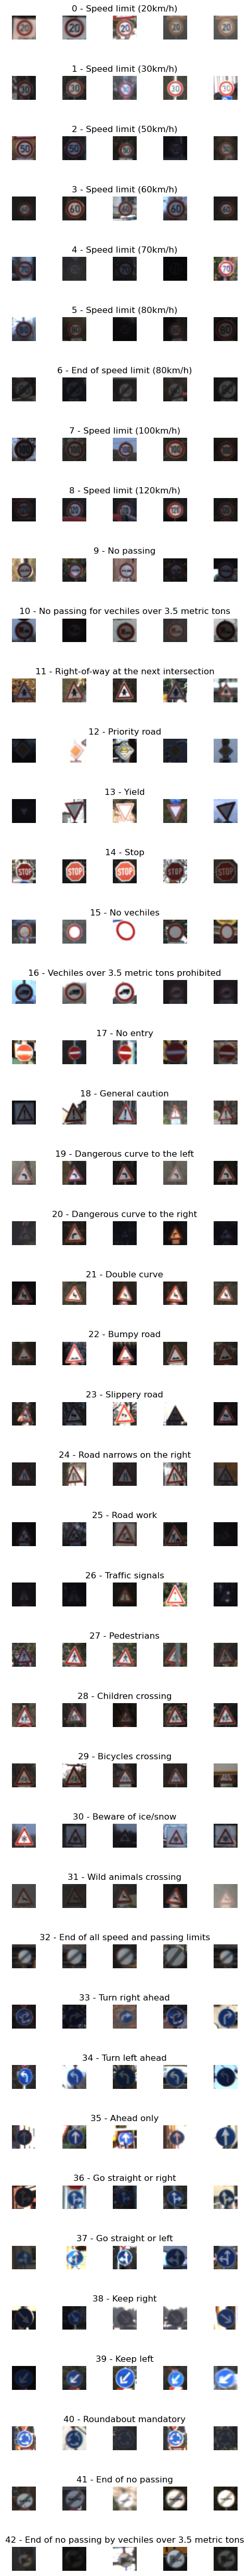

In [39]:
import random

num_of_samples=[]

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j, row in df.iterrows():
        x_selected = X_train[Y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + " - " + row["SignName"])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


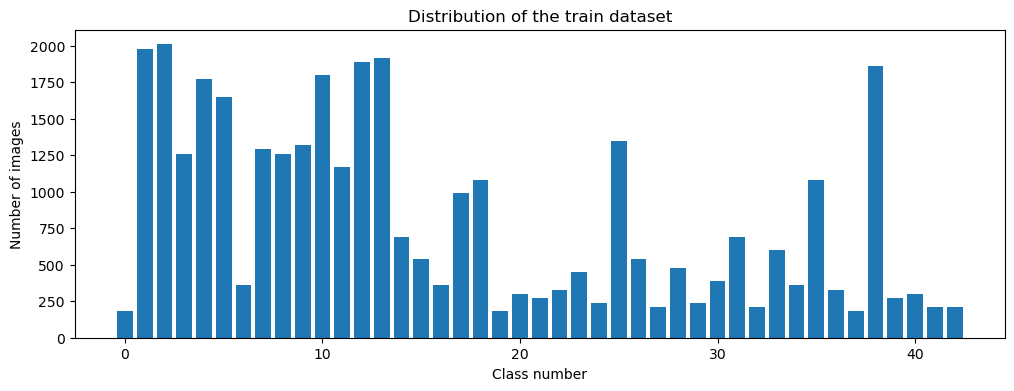

In [40]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


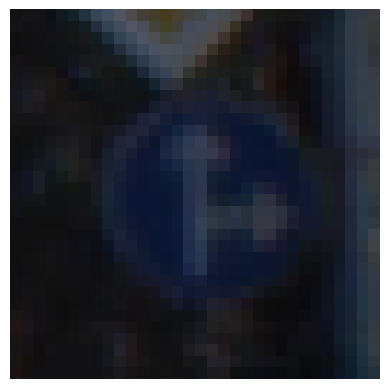

In [41]:
import cv2
 
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(Y_train[1000])

In [42]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

(32, 32)


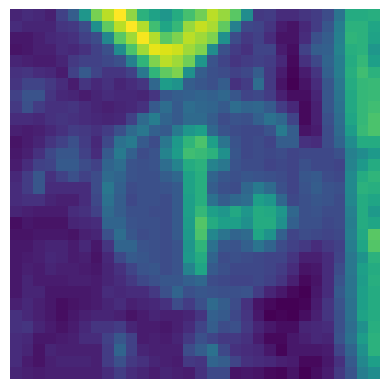

In [43]:
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [44]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img

(32, 32)


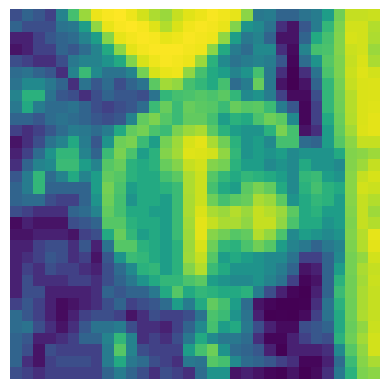

In [45]:
img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

In [46]:
def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

(34799, 32, 32)


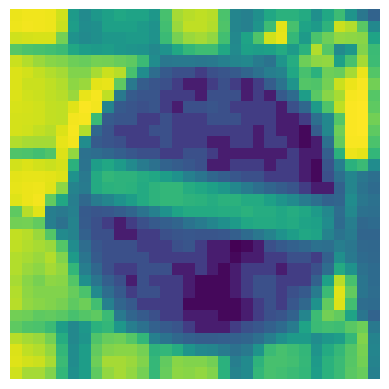

In [47]:
X_train = np.array(list(map(preprocess, X_train)))
X_valid = np.array(list(map(preprocess, X_valid)))
X_test = np.array(list(map(preprocess, X_test)))
 
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

In [48]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_valid = X_valid.reshape(4410, 32, 32, 1)

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [58]:
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)

In [59]:
datagen.fit(X_train)

(15, 32, 32, 1)


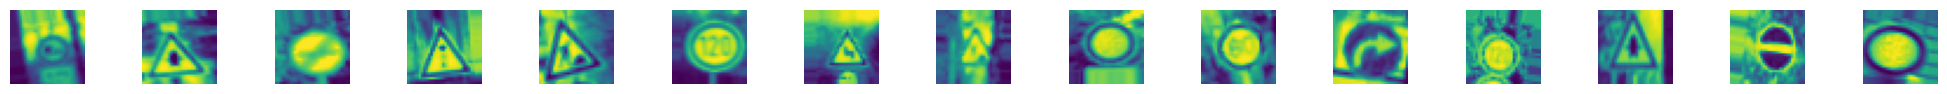

In [60]:
batches = datagen.flow(X_train, Y_train, batch_size = 15)
X_batch, y_batch = next(batches)
 
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")
 
print(X_batch.shape)

In [61]:
Y_train = to_categorical(Y_train, 43)
Y_test = to_categorical(Y_test, 43)
Y_valid = to_categorical(Y_valid, 43)

#### Create Model

In [64]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation='softmax'))
  
  model.compile(Adam(learning_rate= 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [66]:
model = modified_model()
print(model.summary())
 
history = model.fit(datagen.flow(X_train, Y_train, batch_size=50),
                            steps_per_epoch=2000,
                            epochs=10,
                            validation_data=(X_valid, Y_valid), shuffle = 1)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 60)     │        90,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 10, 10, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 30)       │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │       240,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 43)             │        21,543 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10


c:\Users\saadG\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 695/2000 ━━━━━━━━━━━━━━━━━━━━ 51s 39ms/step - accuracy: 0.2802 - loss: 2.6227

c:\Users\saadG\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.4194 - loss: 2.0657 - val_accuracy: 0.9016 - val_loss: 0.3181
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8190 - loss: 0.5916 - val_accuracy: 0.9592 - val_loss: 0.1178
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.8902 - loss: 0.3582 - val_accuracy: 0.9766 - val_loss: 0.0704
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.9178 - loss: 0.2605 - val_accuracy: 0.9703 - val_loss: 0.0938
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.9347 - loss: 0.2149 - val_accuracy: 0.9839 - val_loss: 0.0554
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.9458 - loss: 0.1773 - val_accuracy: 0.9819 - val_loss: 0.0692
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.9510 - loss: 0.1575 - val_accuracy: 0.9853 - val_loss: 0.0517
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.9567 - loss: 0.13

Text(0.5, 0, 'epoch')

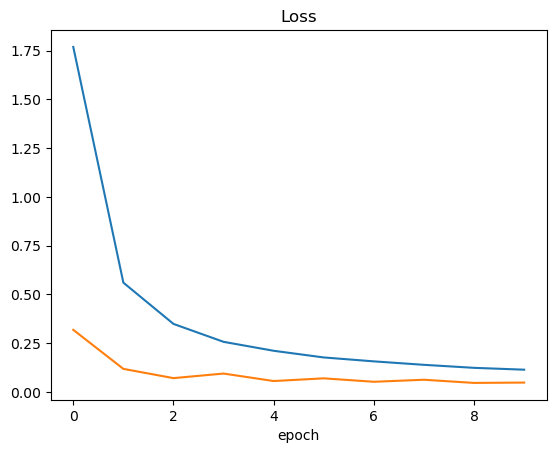

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

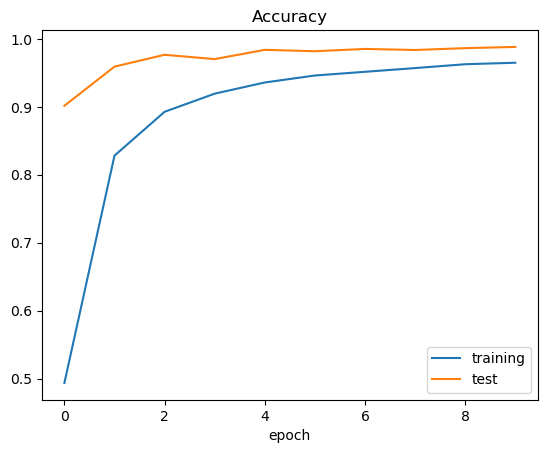

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [73]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.1315401792526245
Test accuracy: 0.966825008392334


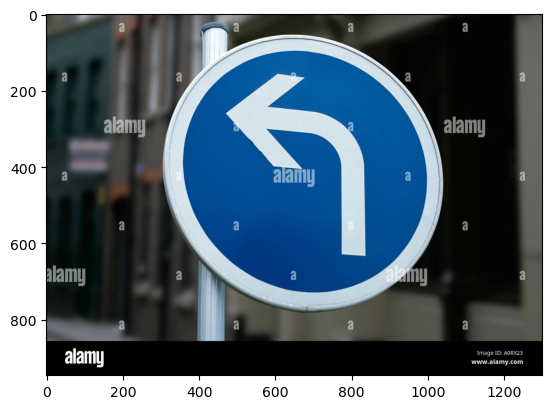

In [74]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

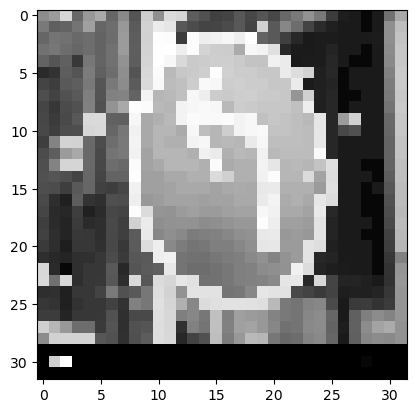

In [75]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))

In [76]:
print(img.shape)

(32, 32)


In [81]:
# Create a dictionary mapping class indices to their corresponding string labels
class_labels = {row['ClassId']: row['SignName'] for index, row in df.iterrows()}

# Print the class_labels mapping
print(class_labels)

{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vechiles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vechiles', 16: 'Vechiles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight o

In [83]:
# Find the index of the class with the highest probability
predicted_class_index = np.argmax(predicted_probabilities)

In [84]:
# Map the numerical index to the corresponding string label
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label
print("Predicted sign:", predicted_class_label)

Predicted sign: Priority road
